# Discovering and visualizing topics from a corpus of Twitter tweets 
 
(modified from microsoft azure notebook sample and www.analyticsvidhya.com)

Topic modeling +sentiment analysis

#NLP

The dataset used in his example is based on the Sentiment140 dataset. The Sentiment140 dataset has approximately 1,600,000 automatically annotated tweets and 6 fields for each tweet. For illustration purpose, a sample of the Sentiment140 dataset will be used. This sample has 160,000 tweets and two fields for each tweet - the polarity of the tweet and the text of the tweet

In [138]:
## loading Data

In [137]:
import os
import pandas as pd

#loading data
!curl -L -o mydatafile.csv http://azuremlsamples.azureml.net/templatedata/Text%20-%20Input.csv
    
# ls - list directory
dirname=os.getcwd
mydata= pd.read_csv('mydatafile.csv',header=0)
print(len(mydata))

# taking dome training data as first 10000
mydata=mydata[:10000]
print(len(mydata))

mydata.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  2 11.8M    2  303k    0     0   318k      0  0:00:38 --:--:--  0:00:38  318k
  6 11.8M    6  759k    0     0   388k      0  0:00:31  0:00:01  0:00:30  388k
 16 11.8M   16 1999k    0     0   680k      0  0:00:17  0:00:02  0:00:15  680k
 20 11.8M   20 2543k    0     0   643k      0  0:00:18  0:00:03  0:00:15  643k
 35 11.8M   35 4341k    0     0   879k      0  0:00:13  0:00:04  0:00:09  879k
 41 11.8M   41 5088k    0     0   854k      0  0:00:14  0:00:05  0:00:09  956k
 46 11.8M   46 5596k    0     0   806k      0  0:00:15  0:00:06  0:00:09  970k
 52 11.8M   52 6328k    0     0   795k      0  0:00:15  0:00:07  0:00:08  863k
 54 11.8M   54 6684k    0     0   736k      0  0:00:16  0:00:09  0:00:07  807k
 56 11.8M   56 6897k    0     0   694k      0  0:00

160000
10000


,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


## Text Preprocessing 

** 1.Noise Removal - stopwords, handles, urls, punctuation etc **


** 2.word Normalization - tokenization, lemmatization, stemming **


** 3.word Standardization -  regular expression, lookup tables **

** FINAL result :cleaned text **

In [3]:
#1.1 Noise Removal: 
# Remove twitter handles, remove numbers and change all to lowercase

import nltk
import re 
def  clean_data(mystring):
    mystring= re.sub(r'@\w+','',mystring) #remove twitter handle starting with @ 
    mystring= re.sub(r'\d','',mystring) #remove number 
    mystring = re.sub(r'_+', '', mystring) # remove consecutive underscores

    mystring=mystring.lower() # convert to lowercase
    return mystring.strip() # remove starting and ending spaces

#adding new column to mydata with cleaned up data and apply clean_data function
mydata["tweet_text_cleaned"]=mydata.tweet_text.apply(clean_data)
mydata.head()

,sentiment_label,tweet_text,tweet_text_cleaned
0,4,"@elephantbird Hey dear, Happy Friday to You A...","hey dear, happy friday to you already had you..."
1,4,Ughhh layin downnnn Waiting for zeina to co...,ughhh layin downnnn waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's...","i reckon he'll play, even if he's not %...but ..."
3,0,@vaLewee I know! Saw it on the news!,i know! saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...,very sad that http://www.fabchannel.com/ has c...


In [4]:
#1.2 Noise Removal: 
#Create custom noise library and remove those words

noise_library=['is','the','are','hey','if','it','i','to','for','you']
def remove_noise(mystring):
    mystring=mystring.split()
    no_noise_words=[word for word in mystring if word not in noise_library]
    
    no_noise_mystring=" ".join(no_noise_words)
    return no_noise_mystring

mydata["tweet_text_noiseless"]=mydata.tweet_text_cleaned.apply(remove_noise)
mydata.head()

,sentiment_label,tweet_text,tweet_text_cleaned,tweet_text_noiseless
0,4,"@elephantbird Hey dear, Happy Friday to You A...","hey dear, happy friday to you already had you...","dear, happy friday already had your rice's bow..."
1,4,Ughhh layin downnnn Waiting for zeina to co...,ughhh layin downnnn waiting for zeina to co...,ughhh layin downnnn waiting zeina cook breakfast
2,0,"@greeniebach I reckon he'll play, even if he's...","i reckon he'll play, even if he's not %...but ...","reckon he'll play, even he's not %...but know ..."
3,0,@vaLewee I know! Saw it on the news!,i know! saw it on the news!,know! saw on news!
4,0,very sad that http://www.fabchannel.com/ has c...,very sad that http://www.fabchannel.com/ has c...,very sad that http://www.fabchannel.com/ has c...


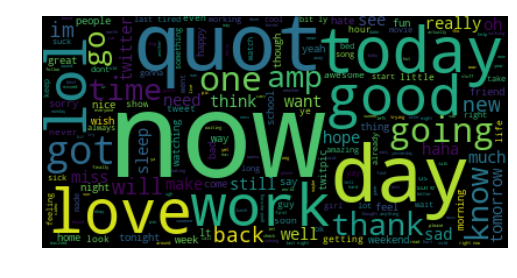

In [95]:
# visualizing via wordcloud
from wordcloud import WordCloud
text=" ".join(mydata.tweet_text_noiseless)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

## 2.1 word Normalization - tokenization -making array of sentences

Tokenization – process of converting a text into tokens
Tokens – words or entities present in the text
Text object – a sentence or a phrase or a word or an article

Regular-Expression Tokenizers A ``RegexpTokenizer`` splits a string into substrings using a regular expression.

In [17]:
from nltk.tokenize import RegexpTokenizer
preprocessed = [" ".join(RegexpTokenizer(r'\w+').\
                         tokenize(mydata.tweet_text_noiseless[idx])) \
                for idx in mydata.index]

print(mydata.tweet_text_noiseless[0:5])
print('tokenized')
(preprocessed[0:5])

0    dear, happy friday already had your rice's bow...
1     ughhh layin downnnn waiting zeina cook breakfast
2    reckon he'll play, even he's not %...but know ...
3                                   know! saw on news!
4    very sad that http://www.fabchannel.com/ has c...
Name: tweet_text_noiseless, dtype: object
tokenized


['dear happy friday already had your rice s bowl lunch',
 'ughhh layin downnnn waiting zeina cook breakfast',
 'reckon he ll play even he s not but know nothing won t be same without him',
 'know saw on news',
 'very sad that http www fabchannel com has closed down one of few web services that i ve used over years']

In [18]:
#3.1 Calculate tf-idf matrix - term frequency-inverse document frequency
#reflects the number times a word appears in the document after adjusting
#for the frequency of the word in the corpus.
    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

custom_stop_words = []
my_stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

vectorizer = TfidfVectorizer(min_df = 1, ngram_range = (1,1), 
                             stop_words = my_stop_words)

tfidf = vectorizer.fit_transform(preprocessed)
print("Created document-term matrix of size {} x {}".format(*tfidf.shape[:2]))

Created document-term matrix of size 10000 x 13379


## Finding and Visualizing  top words in each topic 
Method used: 

Non-Negative Matrix Factorization (NMF)  takes as an input a term-document matrix and generates a 
set of topics that represent weighted sets of co-occurring terms. The discovered topics form a basis
that provides an efficient representation of the original documents.

In [22]:
#3.2 NMF Analysis

from sklearn import decomposition
import numpy as np
nmf = decomposition.NMF(init = 'nndsvd', n_components = 3, max_iter = 200)
W = nmf.fit_transform(tfidf)
H = nmf.components_
print("Generated factor W of size {} and factor H of size {}".format(W.shape, H.shape))

feature_names = vectorizer.get_feature_names()

n_top_words = 10

#%% print top words in each topic
for topic_idx, topic in enumerate(H):
    print("Topic #{}:".format(topic_idx))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


Generated factor W of size (10000, 3) and factor H of size (3, 13379)
Topic #0:
good day work just today morning going like night really

Topic #1:
quot love http just com know amp new like best

Topic #2:
thanks following ff lol got haha great hope followfriday follow



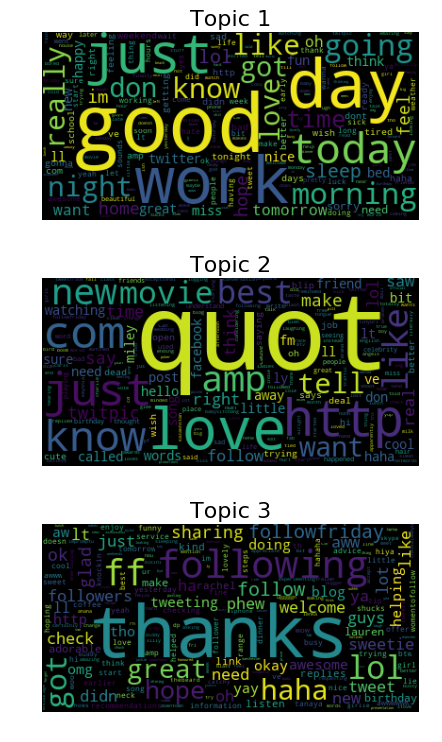

In [135]:
# 3.3 Visualize Topics with Word Cloud¶

#Prepare topics for wordcloud
#%% create pandas dataframe for the topics
mydf = pd.DataFrame({"feature_name": feature_names})

for topic_idx, topic in enumerate(H):
    mydf["topic_{}".format(topic_idx)] = topic

mylist = list(mydf.itertuples())

mywords_topic1 = []
mywords_topic2 = []
mywords_topic3 = []
for order_id, key, num1, num2, num3 in mylist:
    mywords_topic1.append((key, num1))
    mywords_topic2.append((key, num2))
    mywords_topic3.append((key, num3))

mywords_topic1 = dict(sorted(mywords_topic1, key=lambda myword:myword[1], reverse=True))
mywords_topic2 = dict(sorted(mywords_topic2, key=lambda myword:myword[1], reverse=True))
mywords_topic3 = dict(sorted(mywords_topic3, key=lambda myword:myword[1], reverse=True))

from wordcloud import WordCloud
wordcloud = WordCloud()

def wdc(*mywords_topic):
    n_row = len(mywords_topic)
    n_col = 1
    plt.figure(figsize=(n_col * 3 * 1.618, n_row * 3))    
    for index, item in enumerate(mywords_topic, start=1):
        wordcloud.fit_words(item)
        plt.subplot(n_row, n_col, index)
        plt.title('Topic {}'.format(index), size=16)
        plt.imshow(wordcloud)
        plt.axis("off")

wdc(mywords_topic1, mywords_topic2, mywords_topic3)
